## ML Project : Used car price predition

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1. Objective
The objective of this project is to predict the price of used cars based on various attributes.

#### 2. Data Collection
- The Data scuorce : https://www.kaggle.com/competitions/playground-series-s4e9/data
- The data consist of 13 columns and 188533 rows

#### 2.1 Import data and required libraries
Import pandas,numpy,seaboen,matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import re
import warnings
warnings.filterwarnings('ignore')

Import data and store it in csv format

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')


Show top 5 rows

In [4]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


Get shape of the dataframe

In [5]:
train.shape

(188533, 13)

Check for Null values in dataset

In [6]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

Check for dulplicated entries in dataset

In [7]:
train.duplicated().sum()

0

Check the data types of the features

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


Get number of unique values in each feature

In [9]:
train.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

Descriptive statistics : Get min,max,mean, median, quartiles for the data

In [10]:
train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


### Explore the Data

Get numerical and categorical features

In [11]:
column = train.columns
numeric_features = [feature for feature in train.columns if train[feature].dtype != 'O']
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

print('Numeric columns in dataframe : {}'.format(numeric_features))
print('Categorical columns in dataframe : {}'.format(categorical_features))

Numeric columns in dataframe : ['id', 'model_year', 'milage', 'price']
Categorical columns in dataframe : ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


Check Unique values in categorical features

In [12]:
for col in categorical_features:
    print('Total number of unique values in {} are {}:'.format(col,train[col].nunique()))
    print(train[col].unique(),'\n')

Total number of unique values in brand are 57:
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach'] 

Total number of unique values in model are 1897:
['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL'] 

Total number of unique values in fuel_type are 7:
['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported'] 

Total number of unique values in engine are 1117:
['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0H

In [13]:
most_common = dict()
for i in categorical_features:
    value = str(train[i].value_counts()[:1].index.values[0])
    most_common[i] = value

Text(0.5, 1.0, 'Distribution of vehicle price')

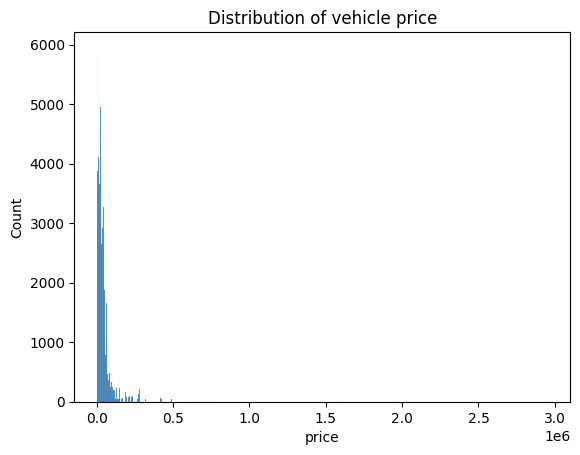

In [14]:
sns.histplot(train['price'])
plt.title('Distribution of vehicle price')

Removing outliers: Vehicles with cost more than $500000

In [15]:
train[train['price']>500000].shape

(352, 13)

In [16]:
train = train[train['price']<=500000]

### Feature Extraction

Extract featues from Engine and Transmission data

In [17]:
def extract(df):
    df['transmission'] = df['transmission'].str.lower()
    df['transmission_type'] = df['transmission'].apply(lambda x:
        'manual' if 'm/t' in x or 'manual' in x or 'mt' in x else 
        'automatic' if 'a/t' in x or 'automatic' in x else
        'CVT' if 'CVT' in x else
        'dual' if 'dual' in x else 'other'
    )
    df['hoursepower'] = df['engine'].str.extract(r'(\d+\.\d+)(?=HP)').astype(float)
    df['capacity'] = df['engine'].str.extract(r'(\d+\.\d+)(?=L| Liter)').astype(float)
    df['Cylinder'] = df['engine'].apply(lambda x: x if pd.isnull(x)
                                    else float(re.search('(\d)\s(Cylinder)',x).group(1)) if re.search('(\d)\s(Cylinder)',x)
                                    else float(re.search('\s(V)(\d)', x ).group(2)) if re.search('\s(V)(\d)', x) else np.nan)
    #df['Cylinder'] = df[['engine','Cylinder']].apply(lambda x: pd.Series(x[0]).str.extract(r'\s(V)(\d)')[1].astype(float) if pd.isnull(x[1]) else x[1],axis=1)
    
    return df

In [18]:
extracted_train = extract(train)
extracted_test = extract(test)

In [19]:
extracted_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_type,hoursepower,capacity,Cylinder
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,a/t,Yellow,Gray,None reported,Yes,4200,automatic,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,4999,automatic,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,a/t,Blue,Gray,None reported,Yes,13900,automatic,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,transmission w/dual shift mode,Black,Black,None reported,Yes,45000,dual,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-speed a/t,Black,Beige,None reported,Yes,97500,automatic,208.0,2.0,4.0


Get the categories with low occurance in the data

In [20]:
model_sample = extracted_train['model'].value_counts()
low_models_samples = list(model_sample[model_sample.values < 101].index)

#### Fill missing missing value and create new features for Luxury brands and Popular interior and exterior colors

In [21]:
def fill_fuel_type(x):
    if pd.isnull(x[1]):
        if 'gasoline' in str.lower(x[0]):
            return 'Gasoline'
        elif 'flex' in str.lower(x[0]):
            return 'E85 Flex Fuel'
        elif (('plug-in'in str.lower(x[0])) or ('electric/gas' in str.lower(x[0]))):
            return 'Plug-In Hybrid'
        elif 'hybrid' in str.lower(x[0]):
            return 'Hybrid'
        elif 'electric' in str.lower(x[0]):
            return 'electric'
        else:
            return np.nan 
    else:
        return x[1]
    
    
def fill_missing_value(df):
    df['fuel_type'] = df[['engine','fuel_type']].apply(lambda x : fill_fuel_type(x),axis=1)
    df['fuel_type'].fillna('Gasoline',inplace=True)
    df['accident'].fillna('None reported',inplace=True)
    df['clean_title'].fillna('Yes' if 'None reported' in df['accident'] else 'No',inplace=True)
    for i in categorical_features:
        df[i] = df[i].replace('–',most_common[i])

    
    colors = ['black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
        'beige', 'tan', 'orange', 'gold', 'yellow', 'purple', 'pink', 
        'charcoal', 'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite',
        'copper', 'slate', 'bronze', 'sand', 'amber','macchiato','ebony','cocoa']
    
    # Cleaning and extracting  int and ext colors. Example- Special colors like 'Metalic Black' is treated as 'black'
    df['int_col'] = df['int_col'].apply(lambda x: x if [color for color in colors if color in str.lower(x).split(' ')] == [] else [color for color in colors if color in str.lower(x).split(' ')][0])
    df['ext_col'] = df['ext_col'].apply(lambda x: x if [color for color in colors if color in str.lower(x).split(' ')] == [] else [color for color in colors if color in str.lower(x).split(' ')][0])

    common_color = ['White','Gray','Black','Silver','Blue','Red','Green','Brown','Orange','Yellow']
    
    df['interior_rare_color'] = df['int_col'].apply(lambda x: 1 if str.lower(x) not in common_color else 0)
    df['exterior_rare_color'] = df['ext_col'].apply(lambda x: 1 if str.lower(x) not in common_color else 0)
    
    luxury_brands = ["Mercedes-Benz", "BMW", "Audi", "Porsche", "Land Rover","Land"
    "Lexus", "Cadillac", "Tesla", "INFINITI", "Jaguar", 
    "Bentley", "Maserati", "Lamborghini", "Genesis", "Rolls-Royce", 
    "Ferrari", "McLaren", "Aston Martin", "Lucid", "Lotus", 
    "Karma", "Bugatti", "Maybach"]
    df['is_luxry_brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    df['age'] = df['model_year'].apply(lambda x: int(2025 - x))
    df['mile/year'] = df['milage']/df['age']
    df['cleaned_model'] = df['model'].apply(lambda x: x if x not in low_models_samples else 'others')
    df.drop(['id','engine','model_year','transmission'],axis=1,inplace=True)
    return df

In [22]:
common_color = ['black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
        'beige', 'tan', 'orange', 'gold', 'yellow', 'purple', 'pink', 
        'charcoal', 'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite',
        'copper', 'slate', 'bronze', 'sand', 'amber','macchiato','ebony','cocoa']
pd.Series('Metalic Black').apply(lambda x: x.astype('str') if [color for color in common_color if color in str.lower(x).split(' ')] == [] else [color for color in common_color if color in str.lower(x).split(' ')][0])

0    black
dtype: object

Call missing vaules function for train and test data

In [23]:
extract_train = extracted_train.copy()
extract_test = extracted_test.copy()
cleaned_train_data = fill_missing_value(extract_train)
cleaned_test_data = fill_missing_value(extract_test)

Checking for missing values

In [24]:
cleaned_test_data.isnull().sum()

brand                      0
model                      0
milage                     0
fuel_type                  0
ext_col                    0
int_col                    0
accident                   0
clean_title                0
transmission_type          0
hoursepower            22181
capacity                4438
Cylinder               14607
interior_rare_color        0
exterior_rare_color        0
is_luxry_brand             0
age                        0
mile/year                  0
cleaned_model              0
dtype: int64

Observation : Missing values filled in all features apart from horsepower,capacity and cylinder

Text(0.5, 1.0, 'Kernal density extimation based on Vehicle age')

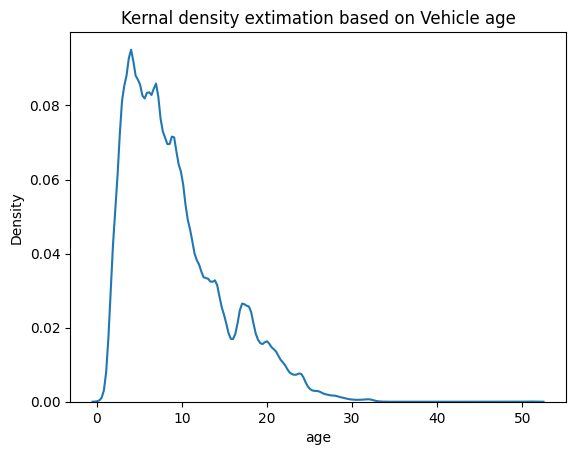

In [25]:
sns.kdeplot(x = 'age',data=cleaned_train_data)
plt.title('Kernal density extimation based on Vehicle age')

Observation: Majority of vehicles have age between 5- 15 years 

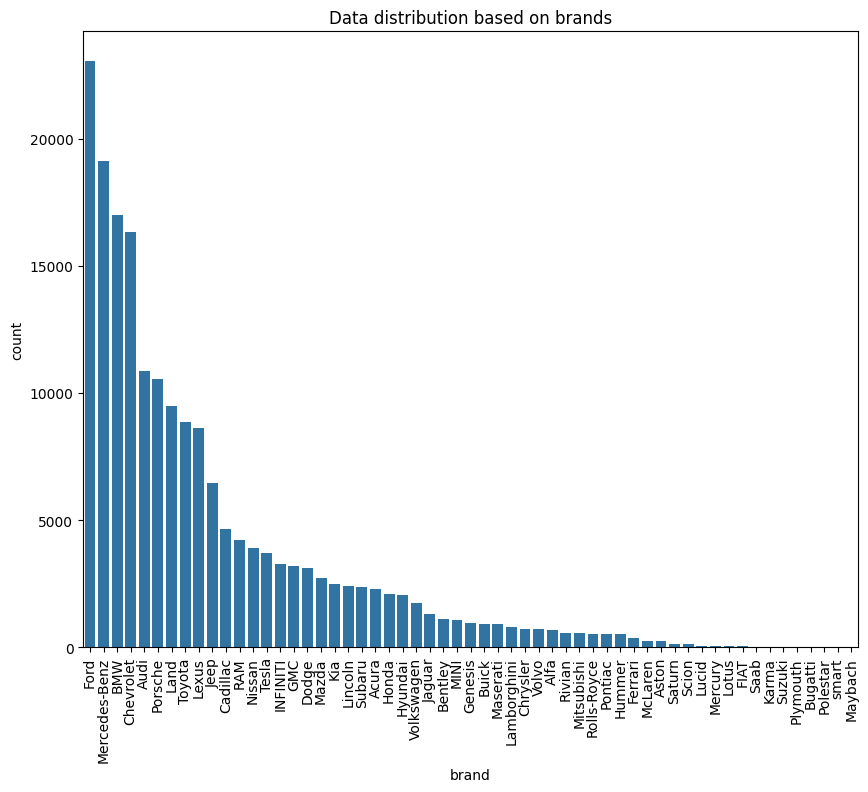

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='brand',data=cleaned_train_data,order=cleaned_train_data['brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Data distribution based on brands')
plt.show()

Observation: The data distribution based on brand is uneven. Few brands have small data size for training

In [27]:
d = cleaned_train_data['brand'].value_counts() < 101
d[d.values == True].index

Index(['Lucid', 'Mercury', 'Lotus', 'FIAT', 'Saab', 'Karma', 'Suzuki',
       'Plymouth', 'Bugatti', 'Polestar', 'smart', 'Maybach'],
      dtype='object', name='brand')

<Axes: xlabel='price', ylabel='Count'>

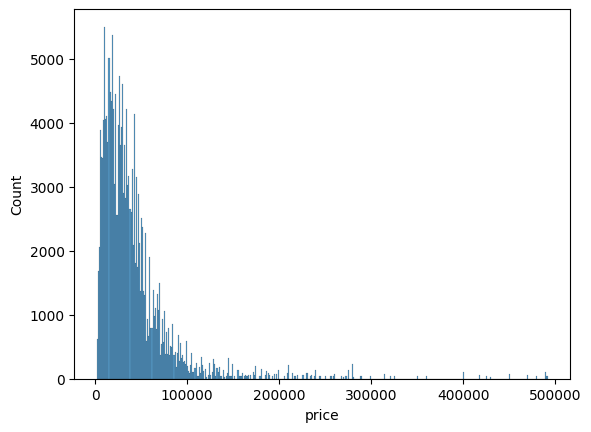

In [29]:
sns.histplot(cleaned_train_data['price'])

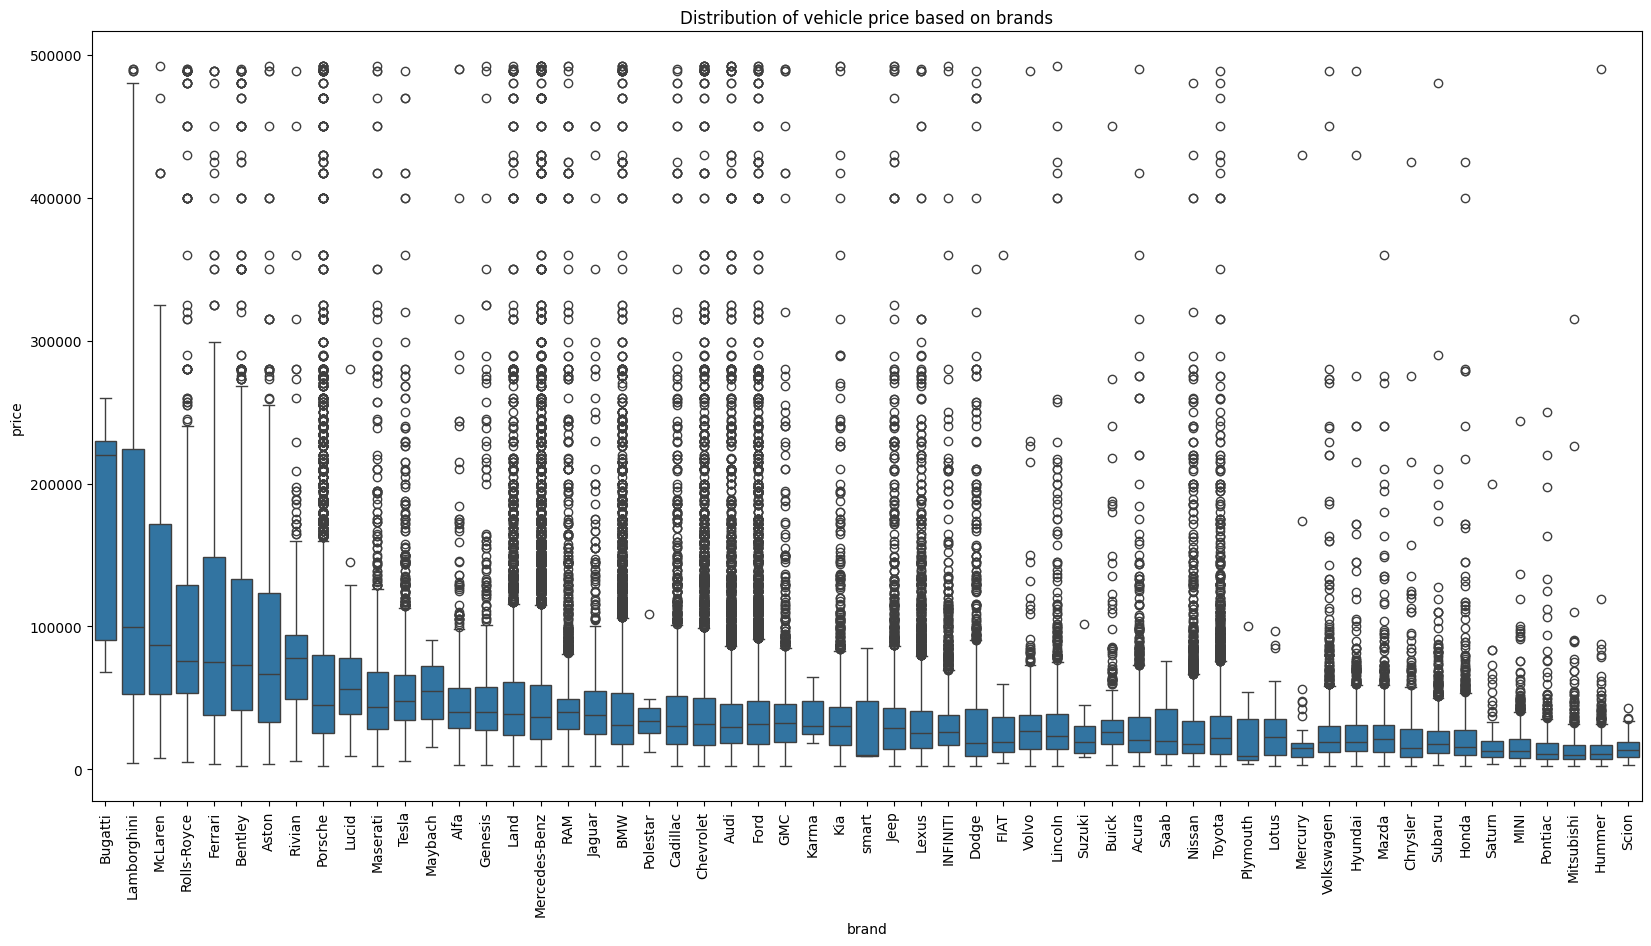

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(data = cleaned_train_data, x='brand',y='price',order=cleaned_train_data.groupby('brand')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 90)
plt.title('Distribution of vehicle price based on brands')
plt.show()

Observation:  Most luxury vehicles have larger price distribution

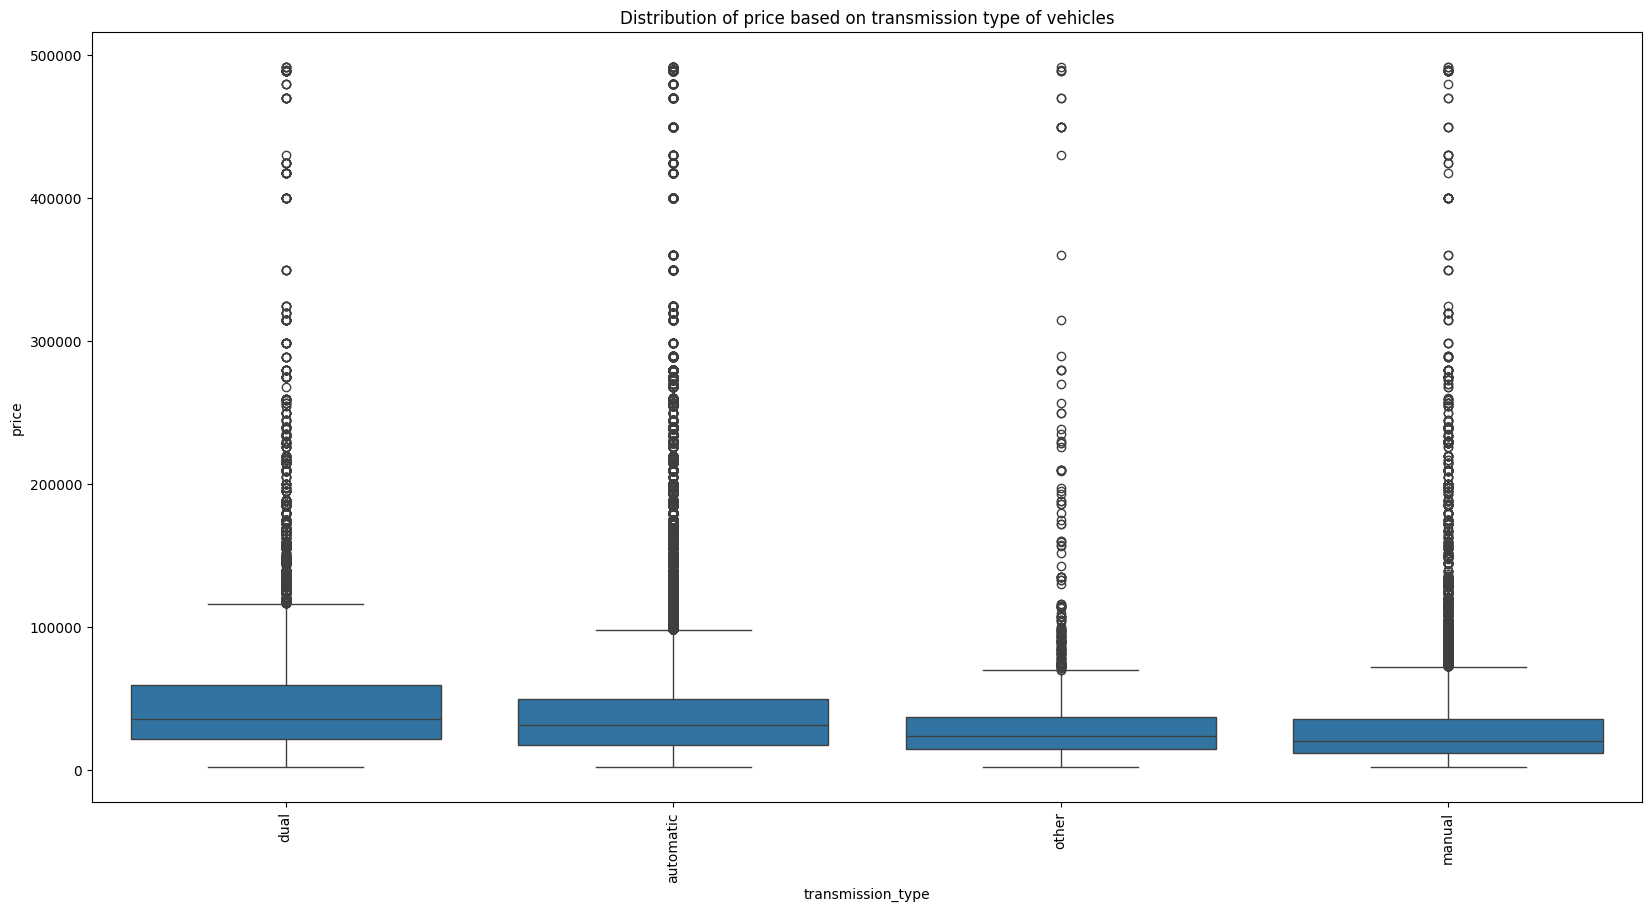

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data = cleaned_train_data, x='transmission_type',y='price',order=cleaned_train_data.groupby('transmission_type')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 90)
plt.title('Distribution of price based on transmission type of vehicles')
plt.show()

Observations:   
1. Avg price of vehicles with dual transmission is highest whereas avg price of vehicles with manual transmission is lowerst

<Axes: >

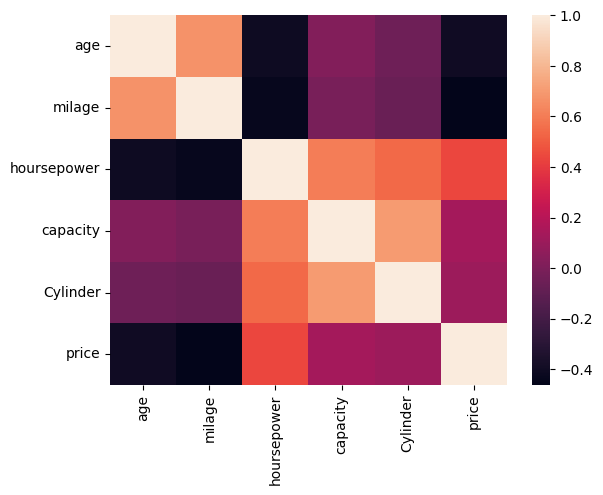

In [32]:
sns.heatmap(cleaned_train_data[['age','milage', 'hoursepower','capacity','Cylinder','price']].corr())

Observations:  
1. Age and milage have high correlation  
2. Cylinder and capacity have high correlation


#### Split features and targets for training and validation

In [33]:
X = cleaned_train_data.drop('price',axis=1)
y = cleaned_train_data['price']

In [34]:
xtrain,xcom,ytrain,ycom  =  train_test_split(X,y,test_size=0.3,random_state=32)
xtest,xval,ytest,yval = train_test_split(xcom,ycom,test_size=0.3,random_state=32)

### Feature Transformation

#### Define the numerical and categoical features for feature transformation

In [35]:
numeric_features = ['milage','hoursepower', 'capacity',
       'Cylinder', 'interior_rare_color', 'exterior_rare_color',
       'is_luxry_brand', 'age', 'mile/year']

categorical_features = ['cleaned_model','fuel_type','transmission_type','accident','clean_title','int_col','ext_col','model']

In [36]:
numeric_features_pipeline = Pipeline(
    [   
        ('fillna',SimpleImputer(strategy='median')),
        ('Scale',MaxAbsScaler())
    ]
)

categorical_features_pipeline = Pipeline(
    [
        ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=True)),
        ('sclae',MaxAbsScaler())
    ]
)

transformer = ColumnTransformer(
    [
        ('numerical',numeric_features_pipeline,numeric_features),
        ('categorical',categorical_features_pipeline,categorical_features)
    ]
)

xtrain_transfromed_array = transformer.fit_transform(xtrain).toarray()
xtest_transfromed_array = transformer.transform(xtest).toarray()
xval_transformed_array = transformer.transform(xval).toarray()

##### Saving the cleaned and transformed outputs in pkl file

In [37]:
pd.DataFrame(xtrain_transfromed_array).to_pickle('xtrain_transfromed.csv')
#pd.DataFrame(xtest_transfromed_array).to_pickle('xtest_transfromed.csv')
pd.DataFrame(xval_transformed_array).to_pickle('xtval_transfromed.csv')

In [38]:
pd.DataFrame(ytrain).to_pickle('ytrain.pkl')
#pd.DataFrame(ytest).to_pickle('ytest.pkl')
pd.DataFrame(yval).to_pickle('yval.pkl')

In [39]:
pd.DataFrame(transformer.transform(X).toarray()).to_pickle('X.csv')
pd.DataFrame(transformer.transform(cleaned_test_data).toarray()).to_pickle('clean_test.csv')


In [40]:
pd.DataFrame(y).to_pickle('y.csv')